In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import healpy as hp

In [3]:
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
hplanck=6.626068e-34 #MKS
TCMB = 2.72548 #Kelvin

In [37]:
x = hp.read_map('../calibrations/LFI_SkyMap_030_1024_R2.01_full.fits')

NSIDE = 1024
ORDERING = NESTED in fits file
Ordering converted to RING


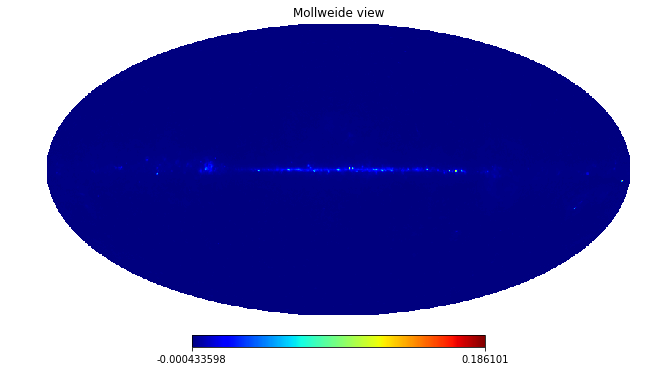

In [38]:
hp.mollview(x)

In [39]:
d2r = np.pi / 180.

In [40]:
lonc = 107.1
latc = 5.2
lonra = [(lonc-4.), (lonc+4.)]
latra = [(latc-4.), (latc+4.)]

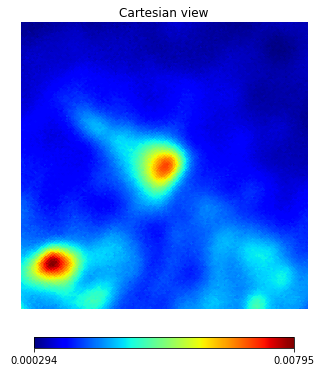

In [41]:
#hp.cartview(x, lonra=lonra, latra=latra, min=-0.00023, max=0.0078)
hp.cartview(x, lonra=lonra, latra=latra)

In [42]:
y = hp.smoothing(x, fwhm=1.*d2r)

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [43]:
y = hp.ud_grade(x, 512)

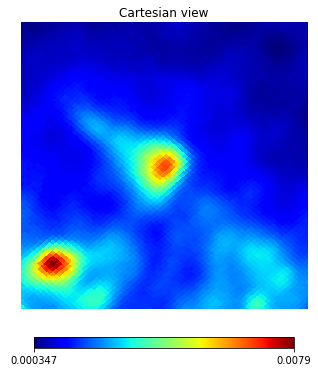

In [44]:
#hp.cartview(y, lonra=lonra, latra=latra, min=-0.00023, max=0.0078)
hp.cartview(y, lonra=lonra, latra=latra)

In [46]:
nu = 28.5e9
X = hplanck * nu / (kboltz * TCMB) 

In [47]:
actualbeam = ( (30./60.) * (np.pi / 180.) )**2

In [48]:
print actualbeam

7.61543549467e-05


In [49]:
print hp.nside2pixarea(512)

3.99474163512e-06


In [51]:
print np.exp(X) * (X / (np.exp(X) - 1.))**2

0.979273876621


In [52]:
Sy = 2. * kboltz * nu**2 / clight**2 * np.exp(X) * (X / (np.exp(X) - 1.))**2 * y * hp.nside2pixarea(512) * 1.e26

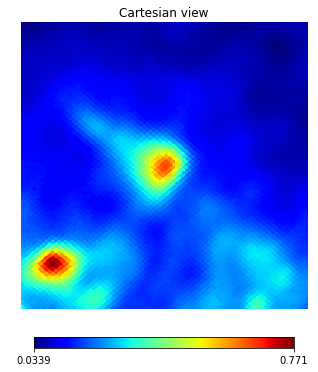

In [53]:
hp.cartview(Sy, lonra=lonra, latra=latra)

In [54]:
theta1 = np.pi / 2. - latc * d2r 
phi1 = lonc * d2r
vec1 = hp.rotator.dir2vec(theta1, phi1)
vec1 = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask2 = hp.query_disc(512, vec1, 1.*d2r)
amaskout = set(hp.query_disc(512, vec1, 2.*d2r))
amaskin = set(hp.query_disc(512, vec1, (80./60.)*d2r))
amask2 = np.array(list(amaskout.difference(amaskin)))
rdata2 = Sy[rmask2]
adata2 = Sy[amask2]
print np.sum(rdata2 - np.median(adata2))

In [56]:

print vec1

[-0.29283017  0.95185935  0.09063258]


In [57]:

print vec1

[-0.29283017  0.95185935  0.09063258]


45.4593364126


In [39]:
indx = np.arange(len(y))
theta, phi = hp.pix2ang(512, indx)
lats = (np.pi / 2. - theta) / d2r 
lons = phi / d2r

In [42]:
hp.nside2resol(512, arcmin=True) / 60

0.11451621372724687

In [43]:
radius = np.sqrt( (lats - latc)**2 + (lons - lonc)**2 )
rmask = radius < 1.
amask = (radius > 80./60.) & (radius < 2.)

In [44]:
rpix = hp.ang2pix(512, theta[rmask], phi[rmask])
apix = hp.ang2pix(512, theta[amask], phi[amask])

In [45]:
rdata = Sy[rpix]
adata = Sy[apix]

In [48]:
print np.sum(rdata - np.median(adata))

42.5319309862
